# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import modin.pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.52e-06
Time:                        17:39:54   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

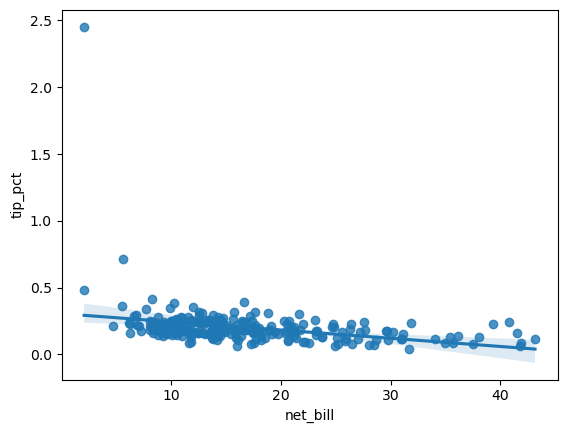

In [12]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # Porcentagem da gorgeta
tips['net_bill'] = tips['total_bill'] - tips['tip'] # valor da conta liquida (sem a gorjeta)

model = smf.ols('tip_pct ~ net_bill', data=tips)
results = model.fit()
print(results.summary())

sns.regplot(x='net_bill', y='tip_pct', data=tips)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [13]:
tips['log_net_bill'] = np.log(tips['net_bill'])
model = smf.ols('tip_pct ~ log_net_bill', data=tips)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.62e-13
Time:                        17:40:10   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [20]:
tips['net_bill_squared'] = tips['net_bill'] ** 2
model = smf.ols('tip_pct ~ net_bill + net_bill_squared', data=tips)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.06e-09
Time:                        17:48:38   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [27]:
tips['log_tip_pct'] = np.log(tips['tip_pct'])

model = smf.ols('log_tip_pct ~ net_bill', data=tips)
results = model.fit()
r_quad = (results.resid.var() / tips['tip_pct'].var())
print(f'R2 de tip_pct é: {r_quad}\n ')
print(results.summary())


R2 de tip_pct é: 5.250896390525901
 
                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           8.27e-16
Time:                        18:11:43   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [26]:
tips['log_net_bill'] = np.log(tips['net_bill'])
model = smf.ols('np.log(tip_pct) ~ log_net_bill', data=tips)
results = model.fit()
r_quad = (results.resid.var() / tips['tip_pct'].var())
print(f'R2 de tip_pct é: {r_quad}\n ')
print(results.summary())

R2 de tip_pct é: 4.851722785290625
 
                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           5.20e-20
Time:                        18:11:11   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept  

###  6. qual modelo resultou no melhor ajuste?

In [ ]:
# na verdade não vi relevância nos ajustes visto que todos estão bem abaixo do esperado